In [277]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
from collections import defaultdict 
import math
import statistics
from PIL import Image

In [278]:
def initGreyscale(filepath):
    image_path = filepath 
    img = Image.open(image_path)
    new_width = 300
    new_height = 300
    img_resized = img.resize((new_width, new_height), Image.ANTIALIAS)
    img_resized = img_resized.convert('L')
    return np.array(img_resized)

In [279]:
def initRegular(filepath):
    image_path = filepath 
    img = Image.open(image_path)
    new_width = 300
    new_height = 300
    img_resized = img.resize((new_width, new_height), Image.ANTIALIAS)
    return np.array(img_resized)

In [280]:
lebron1 = initGreyscale('./lebrons/lebron1.png')
lebron2 = initGreyscale('./lebrons/lebron2.png')
lebron3 = initGreyscale('./lebrons/lebron3.png')
lebron4 = initGreyscale('./lebrons/lebron4.png')
lebron5 = initGreyscale('./lebrons/lebron5.png')

drake1 = initGreyscale('./drakes/drake1.png')
drake2 = initGreyscale('./drakes/drake2.png')
drake3 = initGreyscale('./drakes/drake3.png')
drake4 = initGreyscale('./drakes/drake4.png')
drake5 = initGreyscale('./drakes/drake5.png')

vsauce1 = initGreyscale('./vsauces/vsauce1.png')
vsauce2 = initGreyscale('./vsauces/vsauce2.png')
vsauce3 = initGreyscale('./vsauces/vsauce3.png')
vsauce4 = initGreyscale('./vsauces/vsauce4.png')
vsauce5 = initGreyscale('./vsauces/vsauce5.png')

bruce1 = initGreyscale('./brucelees/bruce1.png')
bruce2 = initGreyscale('./brucelees/bruce2.png')
bruce3 = initGreyscale('./brucelees/bruce3.png')
bruce4 = initGreyscale('./brucelees/bruce4.png')
bruce5 = initGreyscale('./brucelees/bruce5.png')

tom1 = initGreyscale('./tomcruises/tom1.png')
tom2 = initGreyscale('./tomcruises/tom2.png')
tom3 = initGreyscale('./tomcruises/tom3.png')
tom4 = initGreyscale('./tomcruises/tom4.png')
tom5 = initGreyscale('./tomcruises/tom5.png')

medic1 = initGreyscale('./medics/medic1.png')
medic2 = initGreyscale('./medics/medic2.png')
medic3 = initGreyscale('./medics/medic3.png')
medic4 = initGreyscale('./medics/medic4.png')
medic5 = initGreyscale('./medics/medic5.png')

lin1 = initGreyscale('./lins/lin1.png')
lin2 = initGreyscale('./lins/lin2.png')
lin3 = initGreyscale('./lins/lin3.png')
lin4 = initGreyscale('./lins/lin4.png')
lin5 = initGreyscale('./lins/lin5.png')

/var/folders/cw/pwh1lm693vj2kn_b0gzqpl3r0000gn/T/ipykernel_31939/851531082.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_resized = img.resize((new_width, new_height), Image.ANTIALIAS)


In [281]:
faces_database = {}
dimension_approx = 5

In [282]:
def add_faces_collection(faces, name):
    approximated_faces = [lowDimensionApproximation(dimension_approx, face) for face in faces]
    approximated_faces.append(amoritize(approximated_faces))
    faces_database[name] = approximated_faces

In [283]:
def face_recognition(filepath, ranking):
    img = initRegular(filepath)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    image = lowDimensionApproximation(dimension_approx, initGreyscale(filepath))
    euclid_distances = []
    for name in faces_database:
        for face in faces_database[name]:
            euclid_distances.append({name : euclidianDistance(image, face)})
    
    euclid_distances = sorted(euclid_distances, key = lambda dist: list(dist.values())[0])
    euclid_distances = euclid_distances[:ranking ]
    mean = statistics.mean([list(d.values())[0] for d in euclid_distances])
    std = statistics.stdev([list(d.values())[0] for d in euclid_distances])

    distance_sums = defaultdict(int)
    for distance in euclid_distances:
        val = list(distance.values())[0]
        key = list(distance.keys())[0]
        zscore = (val - mean) / std
        if val <= mean:
            val =val +  2 * (mean - val)
        else:
            val = val- 0.5 * (mean - val)
        val = val** (math.e ** (-0.2 * zscore))
        distance_sums[key] += val
    distance_tot = sum(distance_sums.values())
    c_level = 0
    for key, value in distance_sums.items():
        print(f'{key}: {value / distance_tot} confidence level.')
        if key == 'vsauce': 
            c_level = value / distance_tot
    return(c_level)

In [299]:
def lowDimensionApproximation(n,matrix):
    U, sig, V = svd(matrix , full_matrices = False)
    totalVariance = sum([x**2 for x in sig])
    retainedVariance = sum([x**2 for x in sig[:n]])
    approxU = U[:, :n]
    approxSig = np.zeros((n, n))
    np.fill_diagonal(approxSig, sig[:n])
    approxV = V[:n, :]
    newImage = approxU @ approxSig @ approxV
    #plt.imshow(newImage, cmap='gray')
    #plt.axis('off')
    #plt.show()
    #print(f'retained variance: {retainedVariance / totalVariance}')
    return newImage

In [285]:
def amoritize(images):
    min_size = min(min(array.shape) for array in images)
    squaredImages = [img[:min_size, :min_size] for img in images]
    stacked = np.stack(squaredImages)
    avg = np.mean(stacked, axis = 0)
    plt.imshow(avg, cmap='gray')
    plt.axis('off')
    plt.show()
    return avg

In [286]:
def euclidianDistance(img1, img2):
    return np.linalg.norm(img1 - img2)

In [293]:
def initEfficientDatabase(database, count):
    new_database = defaultdict(list)
    for key, value in database.items():
        face_space = []
        for matrix in value:
            face_space.append(matrix.flatten())
        matrix = np.array(face_space)
        matrix = matrix.T
        for i in range (1, count + 1):
            svdApprox = lowDimensionApproximation(3, matrix)
            mean = np.mean(svdApprox, axis = 1)
            dim = int(math.sqrt(len(mean)))
            mean = mean.reshape(dim, dim)
            plt.imshow(mean, cmap = 'gray')
            plt.axis('off')
            plt.show()
            new_database[key].append(mean)
    return new_database

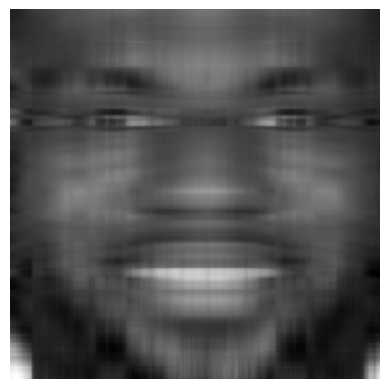

retained variance: 0.9699357643376691


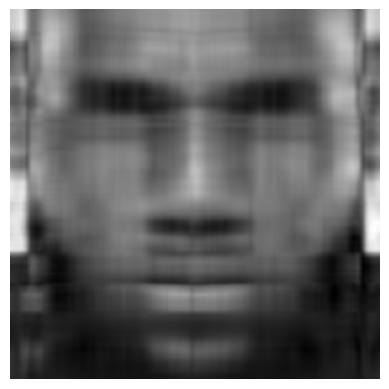

retained variance: 0.9757994276284514


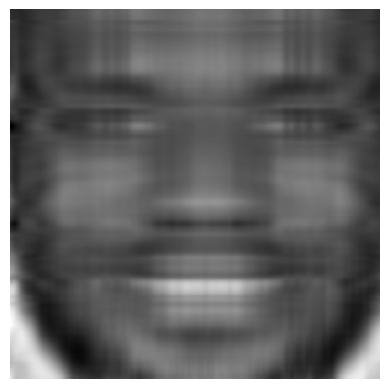

retained variance: 0.9773992500258656


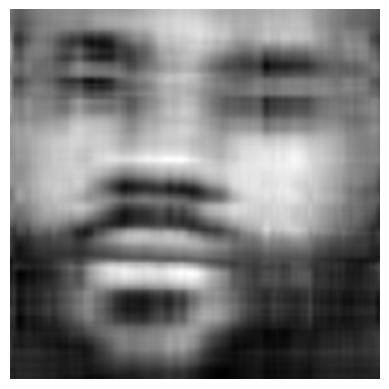

retained variance: 0.9778559181904313


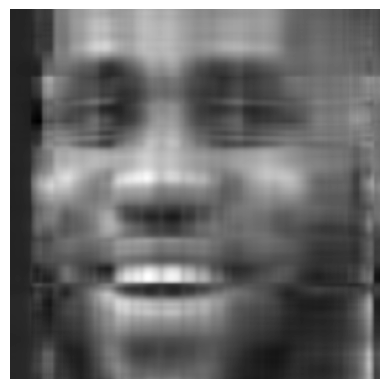

retained variance: 0.9681445297711633


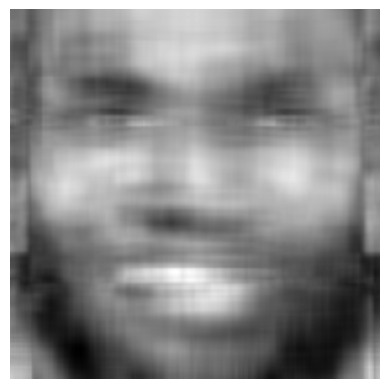

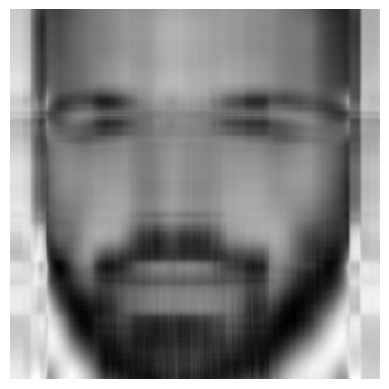

retained variance: 0.9725438195727526


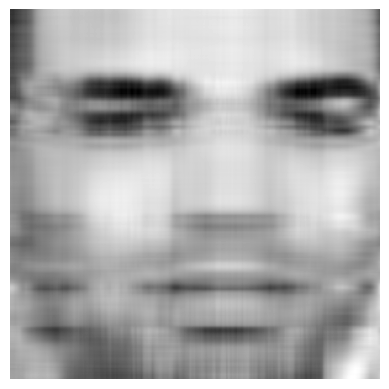

retained variance: 0.992273866521203


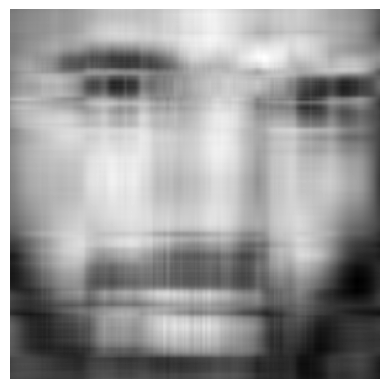

retained variance: 0.9800003940559727


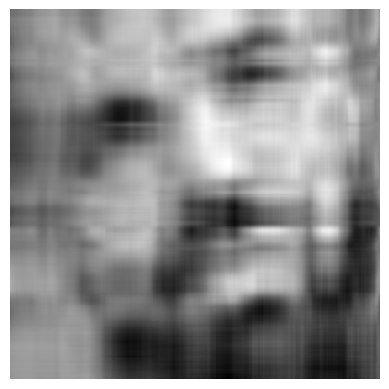

retained variance: 0.9751222662892396


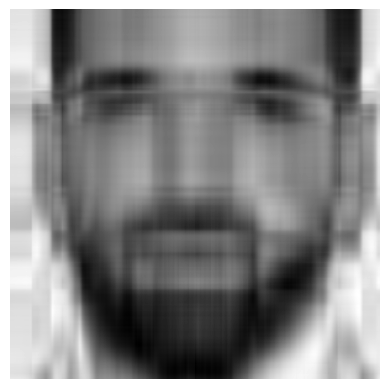

retained variance: 0.9767378251270814


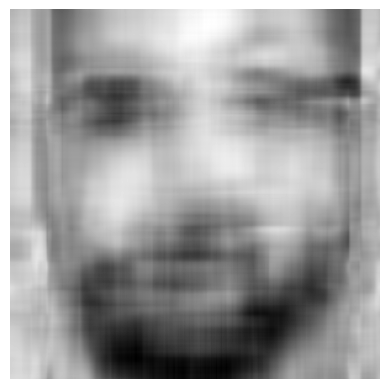

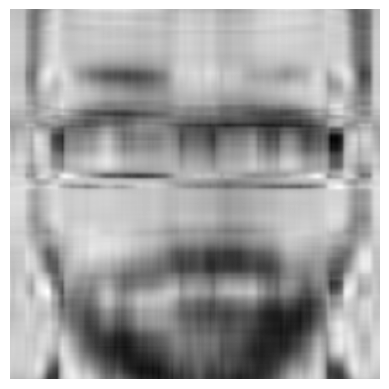

retained variance: 0.9751702671257955


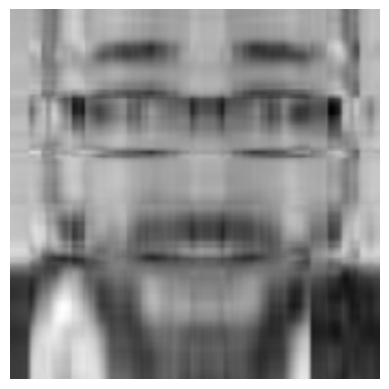

retained variance: 0.968960976238659


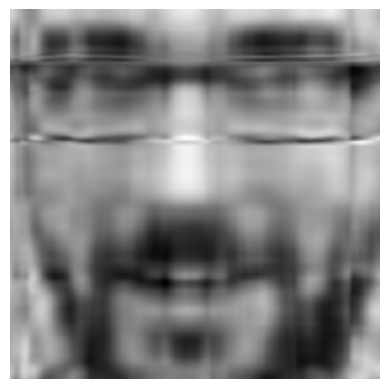

retained variance: 0.9740424118001046


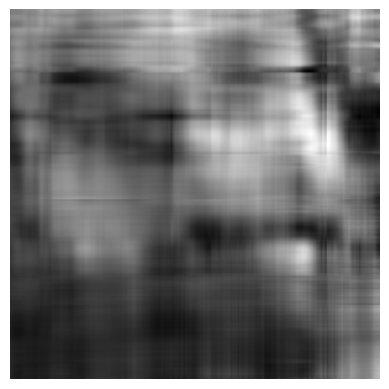

retained variance: 0.9527157096621425


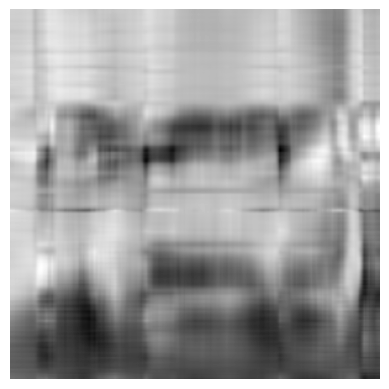

retained variance: 0.9704951732052987


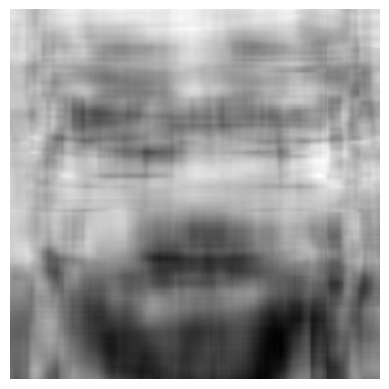

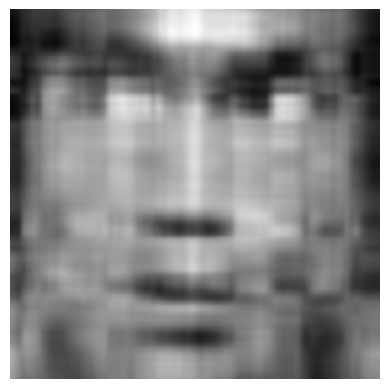

retained variance: 0.965401684674584


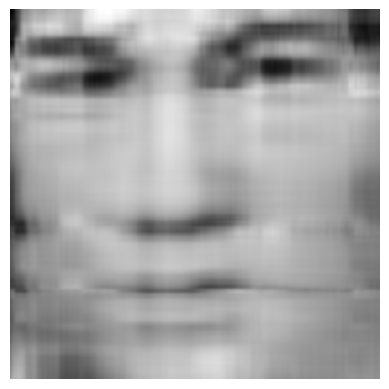

retained variance: 0.9890958356462967


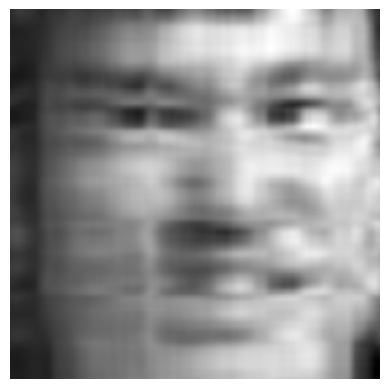

retained variance: 0.9821205280327695


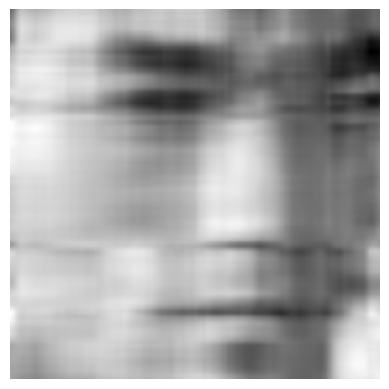

retained variance: 0.9869007287750092


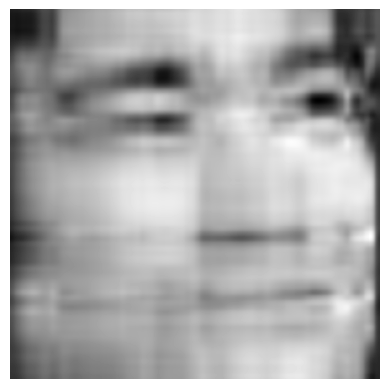

retained variance: 0.9903935189129542


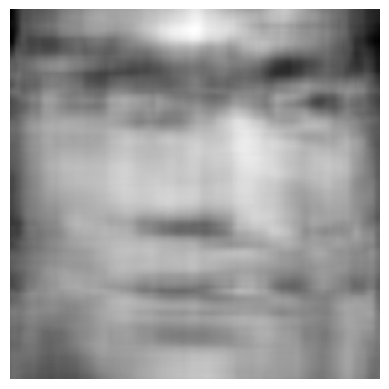

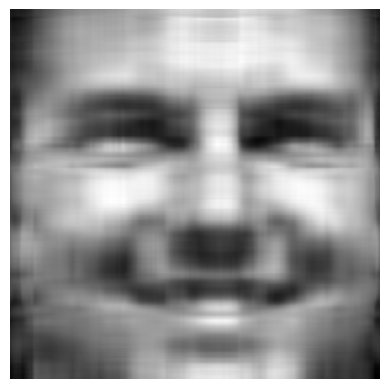

retained variance: 0.9845653747800008


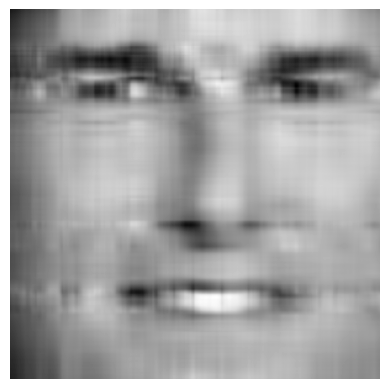

retained variance: 0.993600336394014


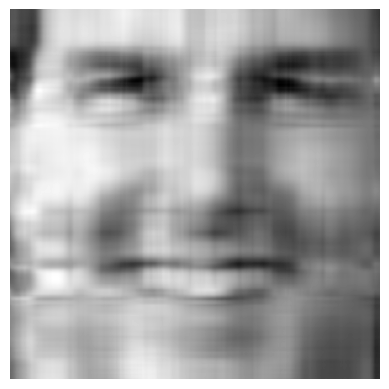

retained variance: 0.9910663640897858


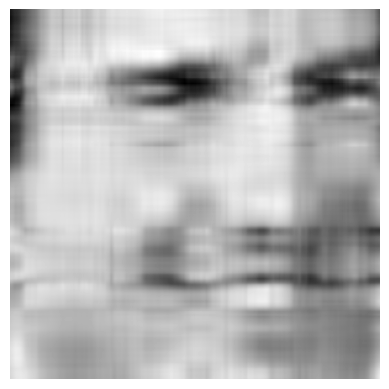

retained variance: 0.9875942883479535


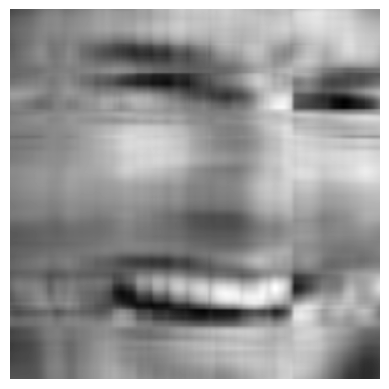

retained variance: 0.9844694298757617


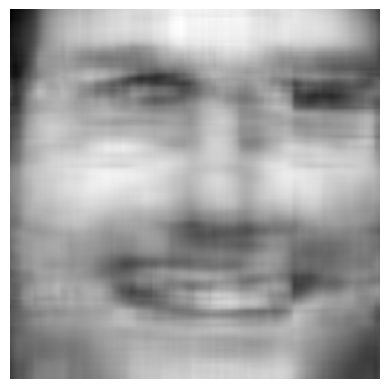

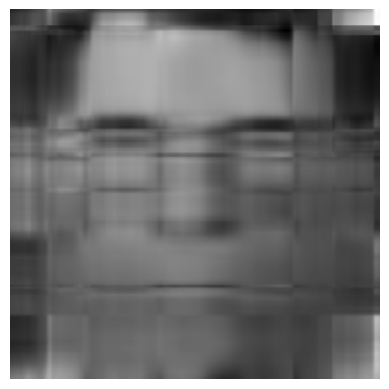

retained variance: 0.9714520333516389


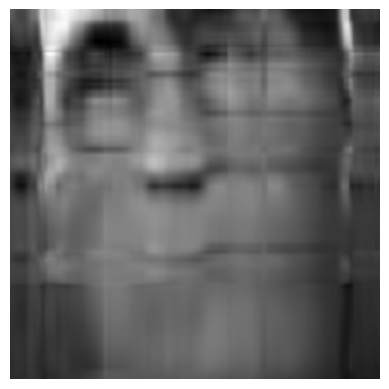

retained variance: 0.9825238376443803


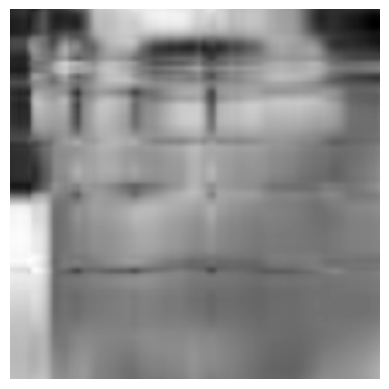

retained variance: 0.9911662985868537


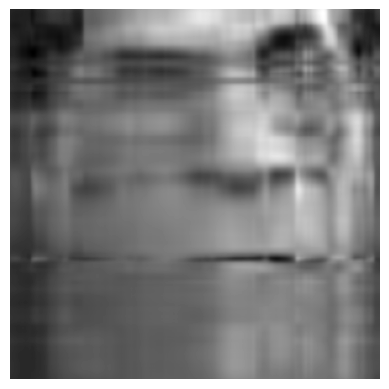

retained variance: 0.9873494776152717


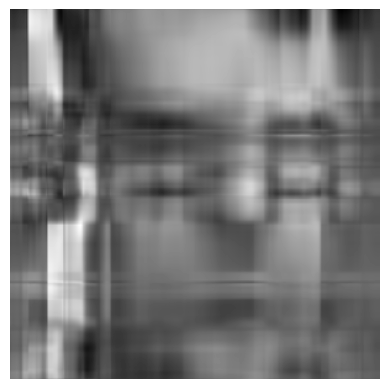

retained variance: 0.9526404889950518


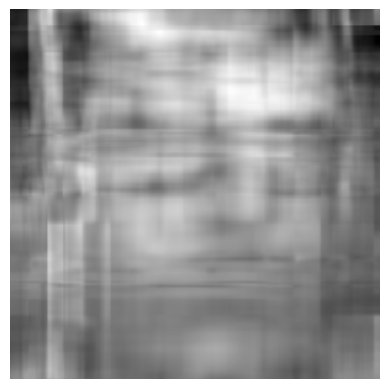

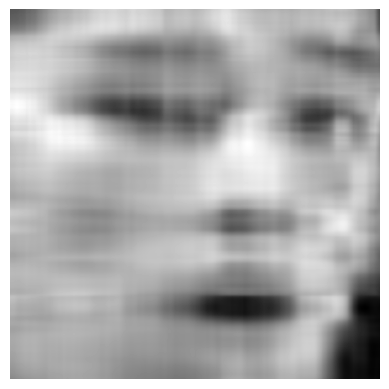

retained variance: 0.9867061368211393


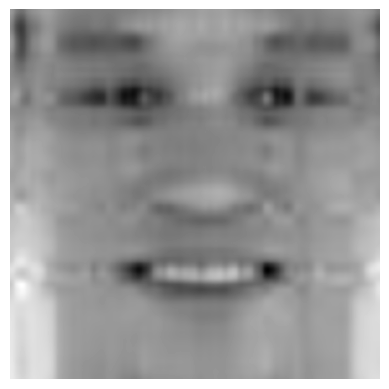

retained variance: 0.9976234920229122


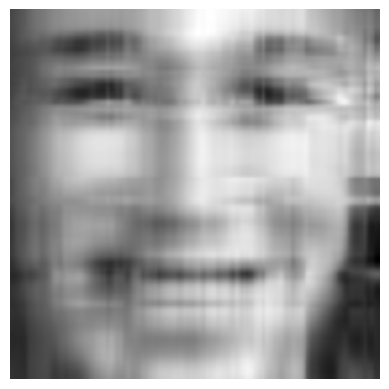

retained variance: 0.9873487899022152


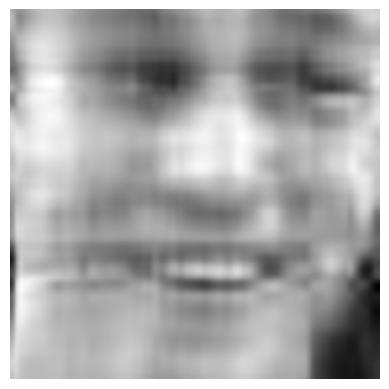

retained variance: 0.9876510130669087


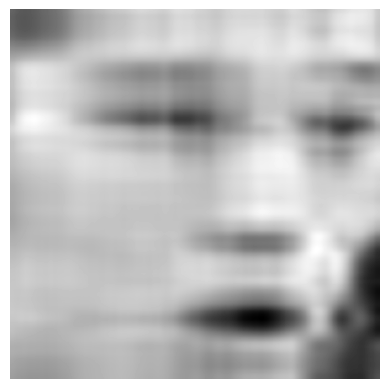

retained variance: 0.9948399193632058


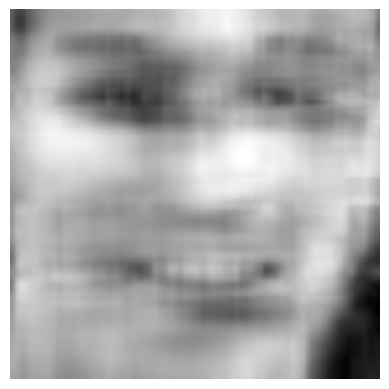

In [288]:
faces_database = {}
add_faces_collection([lebron1, lebron2, lebron3, lebron4, lebron5], 'lebron')
add_faces_collection([drake1, drake2, drake3, drake4, drake5], 'drake')
add_faces_collection([vsauce1, vsauce2, vsauce3, vsauce4, vsauce5], 'vsauce')
add_faces_collection([bruce1, bruce2, bruce3, bruce4, bruce5], 'bruce lee')
add_faces_collection([tom1, tom2, tom3, tom4, tom5], 'tom cruise')
add_faces_collection([medic1, medic2, medic3, medic4, medic5], 'medic')
add_faces_collection([lin1, lin2, lin3, lin4, lin5], 'jeremy lin')

In [297]:
testLin = initRegular('./tests/testLin.png')
testLebron = initRegular('./tests/testLebron.png')
testDurant = initRegular('./tests/testDurant.png')
testDrake = initRegular('./tests/testDrake.png')
testVsauce = initRegular('./tests/testVsauce.png')
testBruce = initRegular('./tests/testBruce.png')
testTom = initRegular('./tests/testTom.png')

/var/folders/cw/pwh1lm693vj2kn_b0gzqpl3r0000gn/T/ipykernel_31939/2418079787.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_resized = img.resize((new_width, new_height), Image.ANTIALIAS)


In [298]:
faces_database

defaultdict(list,
            {'lebron': [array([[ 71.34299889,  70.15469158,  69.80933536, ...,  76.85876299,
                       74.77105005,  72.93903043],
                     [ 70.98663274,  69.79961146,  69.4349972 , ...,  76.37588365,
                       74.31014418,  72.49282789],
                     [ 71.20231773,  70.0294031 ,  69.61217206, ...,  76.024926  ,
                       74.03613667,  72.29014054],
                     ...,
                     [120.76208433, 119.51964131, 117.34368782, ..., 107.34101225,
                      110.66539135, 113.0083919 ],
                     [120.87734666, 119.53605217, 117.17423351, ..., 107.2559644 ,
                      110.59331956, 112.94690899],
                     [121.25243203, 119.83486336, 117.332564  , ..., 107.16961557,
                      110.50192787, 112.83470013]])],
             'drake': [array([[144.84126489, 145.39596926, 145.57572574, ..., 155.27347481,
                      153.01851276, 150.1601092

/var/folders/cw/pwh1lm693vj2kn_b0gzqpl3r0000gn/T/ipykernel_31939/2418079787.py:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_resized = img.resize((new_width, new_height), Image.ANTIALIAS)


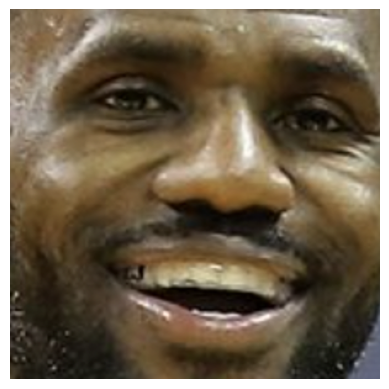

lebron: 0.897048745280118 confidence level.
medic: 0.08466305750874106 confidence level.
vsauce: 0.01828819721114082 confidence level.


0.01828819721114082

In [312]:
face_recognition('./tests/testLebron.png', ranking = 3)

In [291]:
faces_database

{'lebron': [array([[ 22.81595172,  20.46102518,  20.78192409, ...,  21.27196747,
           19.2133216 ,  16.71377085],
         [ 19.69695148,  17.46044539,  17.95638817, ...,  20.49625193,
           18.35470813,  15.73900758],
         [ 20.05811582,  17.98055474,  18.40590271, ...,  19.71290413,
           17.65369352,  15.20210784],
         ...,
         [282.44336022, 284.55632189, 289.11293885, ..., 225.96235982,
          243.13792535, 255.25215072],
         [281.2435549 , 283.79719805, 288.75659264, ..., 228.10919836,
          245.32114837, 257.37758759],
         [281.15872874, 283.89094683, 289.00472177, ..., 229.46292018,
          246.69483571, 258.70703842]]),
  array([[217.86022106, 219.79076485, 221.974072  , ..., 214.81035139,
          213.39865945, 212.91193448],
         [217.02664152, 218.92605395, 221.05928253, ..., 213.50402034,
          212.1861792 , 211.79195545],
         [217.53244442, 219.35741554, 221.39176974, ..., 213.50296099,
          212.33965628,

retained variance: 0.9725015537642523


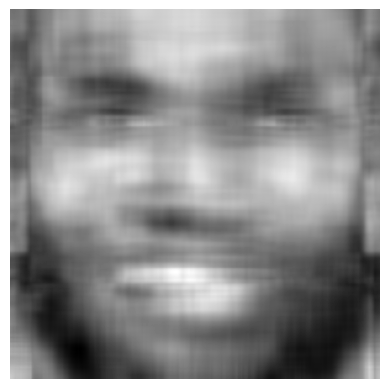

retained variance: 0.9808431319026049


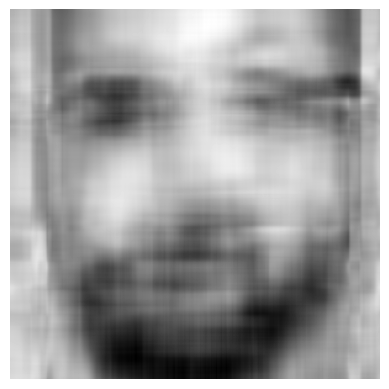

retained variance: 0.9767826800978477


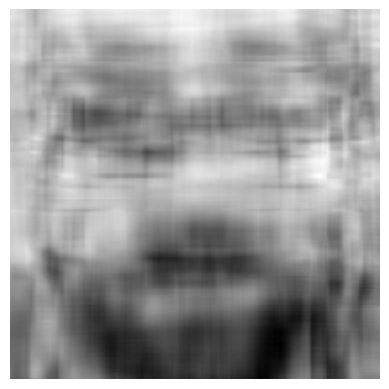

retained variance: 0.9848852703568622


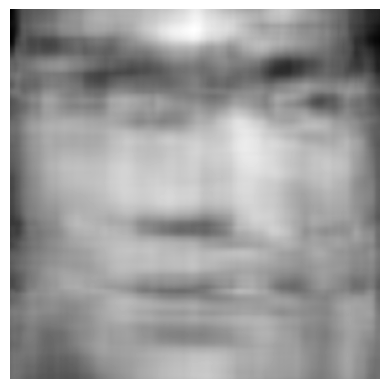

retained variance: 0.9881136672906272


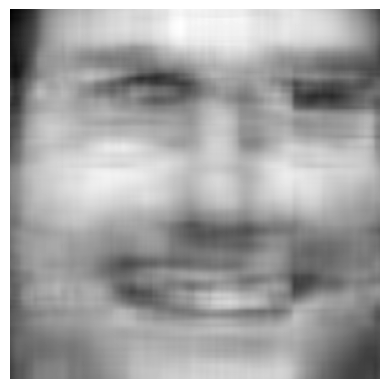

retained variance: 0.9770555974296332


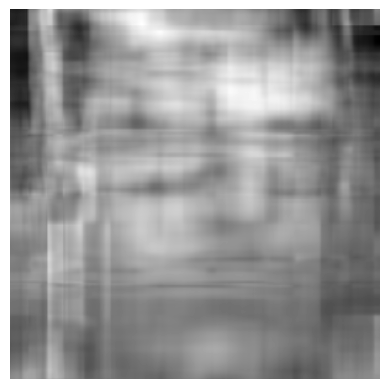

retained variance: 0.9895578327686624


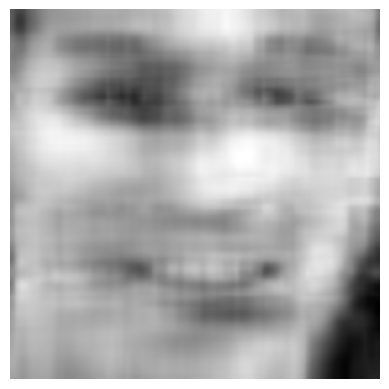

In [294]:
faces_database = initEfficientDatabase(faces_database, count = 1)

In [ ]:
faces_database

In [ ]:
confidence_levels = []
dimension_approx = 1
for i in range (1, 10):
    faces_database = {}
    add_faces_collection([lebron1, lebron2, lebron3, lebron4, lebron5], 'lebron')
    add_faces_collection([drake1, drake2, drake3, drake4, drake5], 'drake')
    add_faces_collection([vsauce1, vsauce2, vsauce3, vsauce4, vsauce5], 'vsauce')
    add_faces_collection([bruce1, bruce2, bruce3, bruce4, bruce5], 'bruce lee')
    add_faces_collection([tom1, tom2, tom3, tom4, tom5], 'tom cruise')
    add_faces_collection([medic1, medic2, medic3, medic4, medic5], 'medic')
    add_faces_collection([lin1, lin2, lin3, lin4, lin5], 'jeremy lin')
    dimension_approx = i
    confidence_levels.append(face_recognition('./tests/testVsauce.png', ranking = 5))

confidence_levels